### 케라스, 텐서플로우 버전 확인

In [20]:
import keras
keras.__version__

'2.3.1'

In [21]:
import tensorflow as tf
tf.__version__

'2.0.0'

### 사용 라이브러리 및 이미지 불러오기

In [105]:
import warnings
warnings.filterwarnings('ignore')

from keras import models, layers
from keras.callbacks import ModelCheckpoint,EarlyStopping
import cv2
from glob import glob
import os
import numpy as np
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import tensorflow as tf
from tensorflow import keras

from keras import regularizers
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization
from keras.callbacks import ModelCheckpoint,EarlyStopping
import matplotlib.pyplot as plt

In [106]:
img_data = glob('C:\\Users\\82106\\Desktop\\sw_0601\\pokemon_l\\*.jpg')
class_name = ['Charmander', 'Gastly', 'Goldeen', 'Gyarados', 'Horsea', 'Mew', 'Mewtwo', 'Pikachu', 'Poliwag', 'Squirtle']
dic = {'Charmander':0,'Gastly':1,'Goldeen':2,'Gyarados':3,'Horsea':4,'Mew':5,'Mewtwo':6,'Pikachu':7,'Poliwag':8,'Squirtle':9}
dic2 = {0:'Charmander',1:'Gastly',2:'Goldeen',3:'Gyarados',4:'Horsea',5:'Mew',6:'Mewtwo',7:'Pikachu',8:'Poliwag',9:'Squirtle'}

### 이미지, 레이블들을 저장

In [143]:
#데이터들을 담을 리스트 정의
X_all = list()
#레이블들을 담을 리스트 정의
Y_all = list()       


for imagename in img_data:       
    try:                      
        img = cv2.imread(imagename) 
        img = cv2.resize(img, dsize=(128, 128))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  
    
        image = np.array(img)  
        X_all.append(img)            
    
        label = imagename.split('\\')   
        label = label[6] 
        label = label.split('.')  
        label = str(label[0])    
        label = dic[label] 
        Y_all.append(label)         
    except :  
        pass # 예외
        

# X, Y리스트들을 NP형식의 배열로 생성    
X_all = np.array(X_all)  
Y_all = np.array(Y_all)

print(X_all)
print(Y_all)
print('X_all shape: ', X_all.shape)
print('Y_all shape: ', Y_all.shape)

[[[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  ...

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]]


 [[[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0   0]]

  [[  0   0   0]
   [  0   0   0]
   [  0   0   0]
   ...
   [  0   0   0]
   [  0   0   0]
   [  0   0

### train, test 데이터셋 분리

In [144]:
X_train,X_test,Y_train,Y_test = train_test_split(X_all, Y_all, test_size = 0.2, shuffle=True, random_state=44)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16127, 128, 128, 3)
(4032, 128, 128, 3)
(16127,)
(4032,)


### 정규화 및 원핫인코딩

In [145]:
X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)
X_train = X_train.astype('float') / 255
X_test = X_test.astype('float') / 255

print('X_train_shape: ', X_train.shape)
print('X_test_shape: ', X_test.shape)
print(X_train[:5])
print(X_test[:5])

X_train_shape:  (16127, 128, 128, 3)
X_test_shape:  (4032, 128, 128, 3)
[[[[0.59215686 0.30980392 0.21568627]
   [0.78039216 0.46666667 0.36862745]
   [0.83137255 0.45490196 0.35686275]
   ...
   [0.81960784 0.50588235 0.40784314]
   [0.80784314 0.4        0.31764706]
   [0.83529412 0.4        0.32156863]]

  [[0.59215686 0.30980392 0.21568627]
   [0.81960784 0.50588235 0.40784314]
   [0.81568627 0.4        0.31372549]
   ...
   [0.81568627 0.50196078 0.40392157]
   [0.80784314 0.50588235 0.40392157]
   [0.81960784 0.43529412 0.3372549 ]]

  [[0.59215686 0.30980392 0.21568627]
   [0.77254902 0.47058824 0.36862745]
   [0.83921569 0.46666667 0.38039216]
   ...
   [0.8        0.44313725 0.34509804]
   [0.78823529 0.40392157 0.31372549]
   [0.80392157 0.50588235 0.40392157]]

  ...

  [[0.59215686 0.30980392 0.21568627]
   [0.77647059 0.47843137 0.37647059]
   [0.82745098 0.4745098  0.36862745]
   ...
   [0.81568627 0.40392157 0.31764706]
   [0.77647059 0.43137255 0.3254902 ]
   [0.8196078

In [146]:
Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)
print('Y_train_shape:', Y_train.shape)
print('Y_test_shape', Y_test.shape)

Y_train_shape: (16127, 10)
Y_test_shape (4032, 10)


### Autoencoder - Unsupervised Learning

In [147]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

autoencoder = Sequential()

# 인코딩 부분입니다.
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', input_shape=(128,128,3), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, activation='relu', padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분이 이어집니다. 
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
#autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
#autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(3, kernel_size=3, padding='same', activation='sigmoid'))

# 전체 구조를 확인해 봅니다.
autoencoder.summary()

# 컴파일 및 학습을 하는 부분입니다.
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=20, batch_size=50, validation_data=(X_test, X_test))

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_391 (Conv2D)          (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_109 (MaxPoolin (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_392 (Conv2D)          (None, 64, 64, 8)         1160      
_________________________________________________________________
conv2d_393 (Conv2D)          (None, 32, 32, 8)         584       
_________________________________________________________________
conv2d_394 (Conv2D)          (None, 32, 32, 8)         584       
_________________________________________________________________
up_sampling2d_167 (UpSamplin (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_395 (Conv2D)          (None, 64, 64, 8)       

### 결과 출력

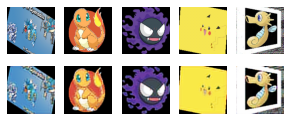

In [148]:
#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i + 1)
    plt.imshow(X_test[image_idx].reshape(128, 128, 3))  #테스트할 이미지
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(128, 128, 3))  #오토인코딩 결과를 다음열에 출력
    ax.axis('off')
    
plt.show()

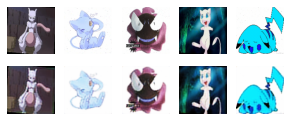

In [150]:
#학습된 결과를 출력하는 부분입니다.
random_test = np.random.randint(X_test.shape[0], size=5)  #테스트할 이미지를 랜덤하게 불러옵니다.
ae_imgs = autoencoder.predict(X_test)  #앞서 만든 오토인코더 모델에 집어 넣습니다.

plt.figure(figsize=(7, 2))  #출력될 이미지의 크기

for i, image_idx in enumerate(random_test):    #랜덤하게 뽑은 이미지를 차례로 나열
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(128, 128, 3))  #테스트할 이미지
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(128, 128, 3))  #오토인코딩 결과를 다음열에 출력
    ax.axis('off')
    
plt.show()

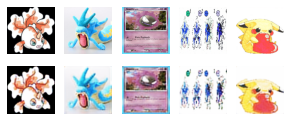

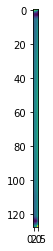

In [151]:
# 오토인코더로 생성된 사진을 저장하는 부분 # test 사진이 4032개 였으므로 오토 인코더로 생성되는 사진의 개수도 동일

if not os.path.exists("./auto_images"):
    os.makedirs("./auto_images")
    
random_test = np.random.randint(X_test.shape[0], size=5)
ae_imgs = autoencoder.predict(X_test)

plt.figure(figsize=(7, 2))

for i, image_idx in enumerate(random_test):
    ax = plt.subplot(2, 7, i + 1) 
    plt.imshow(X_test[image_idx].reshape(128, 128, 3)) 
    ax.axis('off')
    ax = plt.subplot(2, 7, 7 + i +1)
    plt.imshow(ae_imgs[image_idx].reshape(128, 128, 3))
    ax.axis('off')
    
plt.show()

import matplotlib.pyplot as plt

count = 0

for img in ae_imgs:
    plt.imshow(img[0])
    plt.imsave(str(count) + '.' + 'jpg', img)
    count+=1